# Ch. 9 Support Vector Machines

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.datasets import make_classification

import os

%matplotlib inline

In [33]:
def plot_svc(svc, X, y, h=0.002, pad=0.25):
    x_min = X[:, 0].min() - pad
    x_max = X[:, 0].max() + pad
    y_min = X[:, 1].min() - pad
    y_max = X[:, 1].max() + pad
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # np.c_ adds a second axis and concatenates the arrays along that axis.
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
    
    # Support vecotrs are indicated by the the plot's vertical lines.
    sv = svc.support_vectors_
    
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout();
    print('Number of support vectors: ', svc.support_.size)

### 9.7.4 Design a support vector machine with a polynomial kernel

Text(0.5, 1.0, 'Training Set')

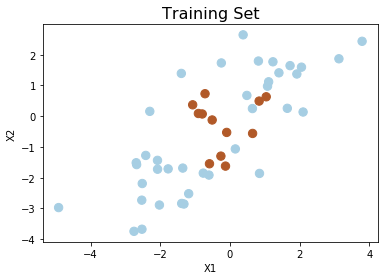

In [3]:
np.random.seed(3)
X = np.random.randn(100, 2)
X[:25] = X[:25] + 2
X[40:70] = X[40:70] - 2
y = np.concatenate([np.repeat(-1, 70), np.repeat(1, 30)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=3)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X_train[:, 0], X_train[:, 1], s=70, c=y_train, cmap=plt.cm.Paired)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Training Set', fontsize=16)

#### Radial SVM

Number of support vectors:  32


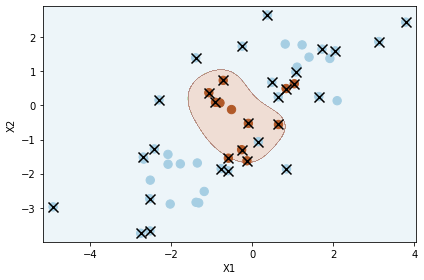

In [4]:
# Radial SVM
svm4_radial = SVC(C=1.0, kernel='rbf', gamma=1)
svm4_radial.fit(X_train, y_train)
plot_svc(svm4_radial, X_train, y_train)

In [5]:
y_pred = svm4_radial.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[30  2]
 [10  8]]
              precision    recall  f1-score   support

          -1       0.75      0.94      0.83        32
           1       0.80      0.44      0.57        18

    accuracy                           0.76        50
   macro avg       0.78      0.69      0.70        50
weighted avg       0.77      0.76      0.74        50



#### Linear SVC

Number of support vectors:  27


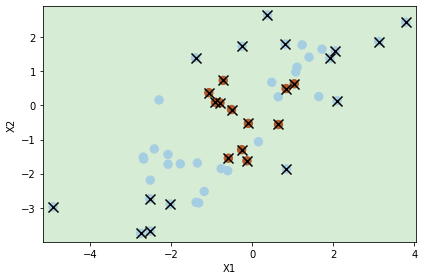

In [6]:
svm4_linear = SVC(C=1.0, kernel='linear')
svm4_linear.fit(X_train, y_train)
plot_svc(svm4_linear, X_train, y_train)

In [7]:
y_pred = svm4_linear.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[32  0]
 [18  0]]
              precision    recall  f1-score   support

          -1       0.64      1.00      0.78        32
           1       0.00      0.00      0.00        18

    accuracy                           0.64        50
   macro avg       0.32      0.50      0.39        50
weighted avg       0.41      0.64      0.50        50



C:\Users\morga\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Radial SVM performed significantly better than the linear SVC.

---
## 9.7.5 Logistic Regression w/ Non-linear Decision Boundary

In [11]:
# Controls the degree of mixture between the two classes.
control = 3
np.random.seed(3)
X = np.random.randn(500, 2)
y = np.random.choice([-1, 1], 500)
X[y==1] = X[y==1] - control

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

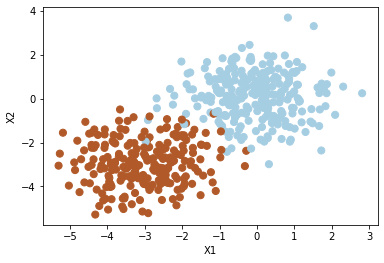

In [12]:
# Dataset has a nonlinear decision boundary.
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

Text(0, 0.5, 'X2')

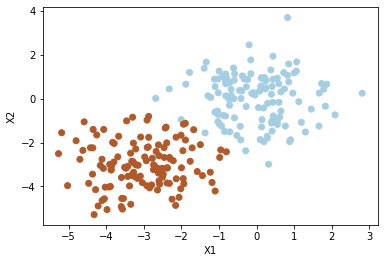

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1], c=y_pred_train, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Logistic Regression predicts the labels assuming a linear decision boundary.

#### Perform a non-linear transformation of the features then predict the training results

In [14]:
X_df = pd.DataFrame(X, columns=['X1', 'X2'])
X2 = X_df.copy()
#X2['X1'] = X2[['X1', 'X2']].apply(lambda x: x[0]*x[1], axis=1)
X2['X2'] = X2['X2'].apply(lambda x: x * x)

Text(0, 0.5, 'X2')

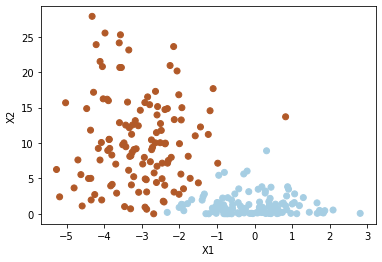

In [15]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.5, random_state=3)

log_reg2 = LogisticRegression()
log_reg2.fit(X2_train, y_train)
y2_pred_train = log_reg2.predict(X2_train)

plt.scatter(X2_train.iloc[:,0], X2_train.iloc[:,1], c=y2_pred_train, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [96]:
X2_train.iloc[:,0]

465     1.905462
269    -1.531859
18     15.788852
416     0.214387
237     6.426297
         ...    
440     0.121424
131    -0.210124
249    -1.720660
152     1.268931
362    -0.061716
Name: X1, Length: 250, dtype: float64

---
## 9.6 How does the value of cost affect the performance of a (linear) SVC?


In [126]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2, random_state=10)

Text(0, 0.5, 'Y1')

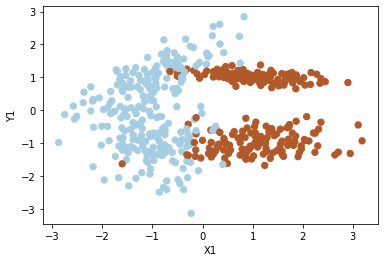

In [127]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('Y1')

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=3)

In [129]:
cost_values = [0.001, 0.01, 0.1, 1, 5, 10, 100]
cross_val_scores = []

for cost in cost_values:
    svc = SVC(C=cost, kernel='linear', random_state=3)
    cv = np.mean(1 - cross_val_score(svc, X_train, y_train, scoring='accuracy', n_jobs=-1, cv=5))
    cross_val_scores.append(cv)
    print('\ncost = ', cost)
    print('Cross Val Error: %.3f' % cv)


cost =  0.001
Cross Val Error: 0.480

cost =  0.01
Cross Val Error: 0.080

cost =  0.1
Cross Val Error: 0.080

cost =  1
Cross Val Error: 0.080

cost =  5
Cross Val Error: 0.070

cost =  10
Cross Val Error: 0.070

cost =  100
Cross Val Error: 0.090


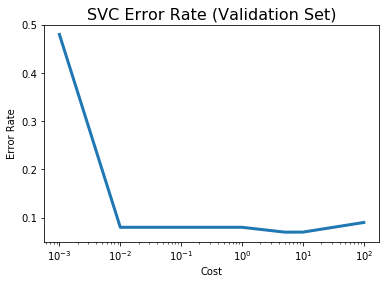

In [130]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(cost_values, cross_val_scores, linewidth=3)
ax.set_title('SVC Error Rate (Validation Set)', fontsize=16)
ax.set_xlabel('Cost')
ax.set_xscale('log')
ax.set_ylabel('Error Rate');

### Test Set

In [131]:
# Calculate the number of misclassified values for each cost
# Training 
misclassifications = []
for cost in cost_values:
    svc = SVC(C=cost, kernel='linear', random_state=3)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_train)
    cf = confusion_matrix(y_train, y_pred)
    num_misclassified = cf[0][1] + cf[1][0]
    misclassifications.append(num_misclassified)
    
    print('\nCost = ', cost)
    print('# - Misclassified: ', num_misclassified)


Cost =  0.001
# - Misclassified:  48

Cost =  0.01
# - Misclassified:  8

Cost =  0.1
# - Misclassified:  8

Cost =  1
# - Misclassified:  8

Cost =  5
# - Misclassified:  6

Cost =  10
# - Misclassified:  6

Cost =  100
# - Misclassified:  6


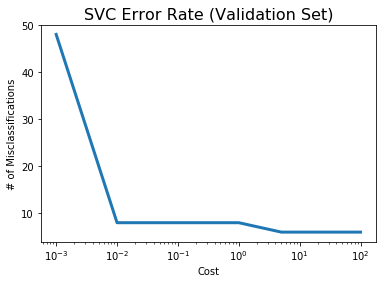

In [132]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(cost_values, misclassifications, linewidth=3)
ax.set_title('SVC Error Rate (Validation Set)', fontsize=16)
ax.set_xlabel('Cost')
ax.set_xscale('log')
ax.set_ylabel('# of Misclassifications');

### Test Set

In [133]:
# Calculate the number of misclassified values for each cost

misclassifications = []
for cost in cost_values:
    svc = SVC(C=cost, kernel='linear', random_state=3)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    num_misclassified = cf[0][1] + cf[1][0]
    misclassifications.append(num_misclassified)
    
    print('\nCost = ', cost)
    print('# - Misclassified: ', num_misclassified)


Cost =  0.001
# - Misclassified:  203

Cost =  0.01
# - Misclassified:  23

Cost =  0.1
# - Misclassified:  22

Cost =  1
# - Misclassified:  22

Cost =  5
# - Misclassified:  25

Cost =  10
# - Misclassified:  26

Cost =  100
# - Misclassified:  26


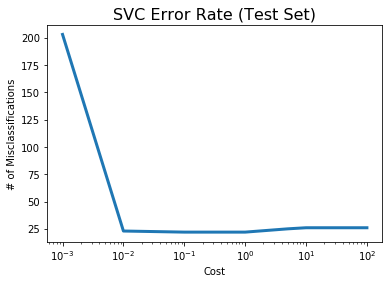

In [134]:
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(cost_values, misclassifications, linewidth=3)
ax.set_title('SVC Error Rate (Test Set)', fontsize=16)
ax.set_xlabel('Cost')
ax.set_xscale('log')
ax.set_ylabel('# of Misclassifications');

When the data is barely linearly seperatble, a SVC with a **smaller value of cost** seems to be perform better than a model with a **huge value of cos**, e.g., cost is 100.

---
## 9.7 Apply SVC/SVM to predict a car's gas mileage.

In [ ]:
url_path = os.path.abspath('..')
boston = pd.read_csv(url_path + '/data/Boston.csv')

In [137]:
url_path = os.path.abspath('..')
auto = pd.read_csv(url_path + '/data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [141]:
mpg_median = auto['mpg'].median()
auto['has_high_mpg'] = auto['mpg'].apply(lambda x: 1 if x > mpg_median else 0)
auto.drop(['mpg', 'name'], axis=1, inplace=True)

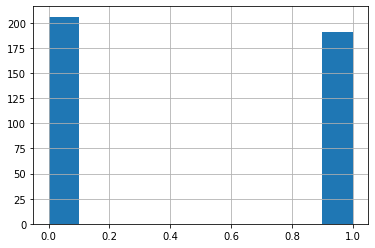

In [142]:
auto['has_high_mpg'].hist()

### (b) Apply a SVC to predict car's class

In [ ]:
X = auto.drop('has_high_mpg', axis=1)
y = auto['has_high
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
